In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

file_name = 'waiting_20.csv'

In [2]:
csv_files = ["waiting_00.csv", "waiting_10.csv", "waiting_20.csv","waiting_30.csv", "waiting_40.csv"]
df_list = (pd.read_csv(file) for file in csv_files)
# Concatenate all DataFrames
big_df   = pd.concat(df_list, ignore_index=True)
big_df.head()

,RunId,iteration,Step,num_drivers,size,waiting_time,multi_pass,seed_int,strategy,Manhattan,AgentID,Steps,IdleTime,sec_id,request_time,pickup_time,dropoff_time
0,0,0,0,1,20,0,False,11,StepType.CLOSEST,0,1,NaN,NaN,0.0,0.0,-1.0,-1.0
1,0,0,0,1,20,0,False,11,StepType.CLOSEST,0,2,-1.0,0.0,NaN,NaN,NaN,NaN
2,0,0,1,1,20,0,False,11,StepType.CLOSEST,0,1,NaN,NaN,0.0,0.0,-1.0,-1.0
3,0,0,1,1,20,0,False,11,StepType.CLOSEST,0,2,0.0,0.0,NaN,NaN,NaN,NaN
4,0,0,2,1,20,0,False,11,StepType.CLOSEST,0,1,NaN,NaN,0.0,0.0,-1.0,-1.0


In [3]:

f_rates = pd.DataFrame()

big_df = big_df.dropna(subset="dropoff_time") # drop car agents

fulfilled = big_df[big_df["dropoff_time"] != -1] # passengers whose requests were fulfilled
unique_fulfilled = fulfilled.drop_duplicates(subset=['seed_int', 'iteration', 'num_drivers', 'strategy', 'AgentID', 'waiting_time'], keep='last')

unique_df = big_df.drop_duplicates(subset=['seed_int', 'iteration', 'num_drivers', 'strategy', 'AgentID', 'waiting_time'], keep='last')

for strategy in ["StepType.CLOSEST", "StepType.QUEUE", "StepType.WAITING"]:
    for waiting in range(00,50,10):
        for i in range(1,6):

            num_fulfilled = len(unique_fulfilled[(unique_fulfilled["strategy"] == strategy) & (unique_fulfilled["num_drivers"] == i) & (unique_fulfilled["waiting_time"] == waiting)])

            total = len(unique_df[(unique_df["strategy"] == strategy) & (unique_df["num_drivers"] == i) & (unique_df["waiting_time"] == waiting)])
            print(num_fulfilled, total)

            f_rate = (num_fulfilled/total) * 100

            f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'waiting_time': waiting}, ignore_index=True)


f_rates

408 3625
488 3650
505 3675
508 3700
492 3725
1164 3625


C:\Users\lokhe\AppData\Local\Temp\ipykernel_6152\3736266342.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'waiting_time': waiting}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_6152\3736266342.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'waiting_time': waiting}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_6152\3736266342.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'waiting_time': waiting}, ignore_index=True)
C:\User

1867 3650
2156 3675
2208 3700
2114 3725
1430 3625
2550 3650
3228 3675
3351 3700


C:\Users\lokhe\AppData\Local\Temp\ipykernel_6152\3736266342.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'waiting_time': waiting}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_6152\3736266342.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'waiting_time': waiting}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_6152\3736266342.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'waiting_time': waiting}, ignore_index=True)
C:\User

3425 3725
1503 3625
2742 3650
3497 3675
3606 3700
3633 3725
1550 3625
2848 3650


C:\Users\lokhe\AppData\Local\Temp\ipykernel_6152\3736266342.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'waiting_time': waiting}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_6152\3736266342.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'waiting_time': waiting}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_6152\3736266342.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'waiting_time': waiting}, ignore_index=True)
C:\User

3542 3675
3610 3700
3640 3725
381 3625
500 3650
496 3675
508 3700
523 3725


C:\Users\lokhe\AppData\Local\Temp\ipykernel_6152\3736266342.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'waiting_time': waiting}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_6152\3736266342.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'waiting_time': waiting}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_6152\3736266342.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'waiting_time': waiting}, ignore_index=True)
C:\User

1167 3625
1879 3650
2128 3675
2153 3700
2193 3725
1410 3625
2527 3650
3242 3675


C:\Users\lokhe\AppData\Local\Temp\ipykernel_6152\3736266342.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'waiting_time': waiting}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_6152\3736266342.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'waiting_time': waiting}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_6152\3736266342.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'waiting_time': waiting}, ignore_index=True)
C:\User

3355 3700
3375 3725
1410 3625
2647 3650
3493 3675
3596 3700
3633 3725
1425 3625


C:\Users\lokhe\AppData\Local\Temp\ipykernel_6152\3736266342.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'waiting_time': waiting}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_6152\3736266342.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'waiting_time': waiting}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_6152\3736266342.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'waiting_time': waiting}, ignore_index=True)
C:\User

2655 3650
3532 3675
3612 3700
3638 3725
421 3625
501 3650
487 3675
523 3700


C:\Users\lokhe\AppData\Local\Temp\ipykernel_6152\3736266342.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'waiting_time': waiting}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_6152\3736266342.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'waiting_time': waiting}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_6152\3736266342.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'waiting_time': waiting}, ignore_index=True)
C:\User

505 3725
1181 3625
1889 3650
2157 3675
2185 3700
2134 3725
1413 3625
2518 3650


C:\Users\lokhe\AppData\Local\Temp\ipykernel_6152\3736266342.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'waiting_time': waiting}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_6152\3736266342.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'waiting_time': waiting}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_6152\3736266342.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'waiting_time': waiting}, ignore_index=True)
C:\User

3254 3675
3358 3700
3411 3725
1413 3625
2652 3650
3493 3675
3598 3700
3634 3725


C:\Users\lokhe\AppData\Local\Temp\ipykernel_6152\3736266342.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'waiting_time': waiting}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_6152\3736266342.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'waiting_time': waiting}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_6152\3736266342.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'waiting_time': waiting}, ignore_index=True)
C:\User

1425 3625
2658 3650
3533 3675
3610 3700
3641 3725


C:\Users\lokhe\AppData\Local\Temp\ipykernel_6152\3736266342.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'waiting_time': waiting}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_6152\3736266342.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'waiting_time': waiting}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_6152\3736266342.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'waiting_time': waiting}, ignore_index=True)
C:\User

,Strategy,num_drivers,f_rate,waiting_time
0,StepType.CLOSEST,1,11.255172,0
1,StepType.CLOSEST,2,13.369863,0
2,StepType.CLOSEST,3,13.741497,0
3,StepType.CLOSEST,4,13.729730,0
4,StepType.CLOSEST,5,13.208054,0
...,...,...,...,...
70,StepType.WAITING,1,39.310345,40
71,StepType.WAITING,2,72.821918,40
72,StepType.WAITING,3,96.136054,40
73,StepType.WAITING,4,97.567568,40


,Strategy,num_drivers,f_rate,waiting_time
0,StepType.CLOSEST,1,11.255172,0
5,StepType.CLOSEST,1,32.110345,10
10,StepType.CLOSEST,1,39.448276,20
15,StepType.CLOSEST,1,41.462069,30
20,StepType.CLOSEST,1,42.758621,40
25,StepType.QUEUE,1,10.510345,0
30,StepType.QUEUE,1,32.193103,10
35,StepType.QUEUE,1,38.896552,20
40,StepType.QUEUE,1,38.896552,30
45,StepType.QUEUE,1,39.310345,40


            Strategy  num_drivers     f_rate  waiting_time
0   StepType.CLOSEST            1  11.255172             0
5   StepType.CLOSEST            1  32.110345            10
10  StepType.CLOSEST            1  39.448276            20
15  StepType.CLOSEST            1  41.462069            30
20  StepType.CLOSEST            1  42.758621            40
          Strategy  num_drivers     f_rate  waiting_time
25  StepType.QUEUE            1  10.510345             0
30  StepType.QUEUE            1  32.193103            10
35  StepType.QUEUE            1  38.896552            20
40  StepType.QUEUE            1  38.896552            30
45  StepType.QUEUE            1  39.310345            40
            Strategy  num_drivers     f_rate  waiting_time
50  StepType.WAITING            1  11.613793             0
55  StepType.WAITING            1  32.579310            10
60  StepType.WAITING            1  38.979310            20
65  StepType.WAITING            1  38.979310            30
70  StepT

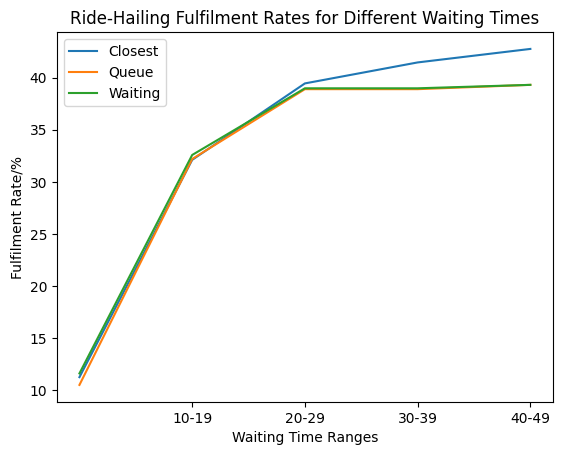

In [5]:
f_rates

n = 1
n_f_rates = f_rates[f_rates["num_drivers"] == n]
display(n_f_rates)

groups = n_f_rates.groupby('Strategy')

# plot a line for each group
fig, ax = plt.subplots()
for name, group in groups:
    print(group)
    ax.plot(group['waiting_time']+5, group['f_rate'], label=name)



ax.set_xlabel('Waiting Time Ranges')
ax.set_ylabel('Fulfilment Rate/%')
ax.set_title('Ride-Hailing Fulfilment Rates for Different Waiting Times')
plt.xticks([15, 25, 35,45], ['10-19', '20-29', '30-39', '40-49'])

plt.legend(['Closest', 'Queue', 'Waiting'])
plt.savefig(f"figures/hailing_frate_waiting_{n}car")